In [40]:
import os
import time
import pickle
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm   
import data_cleaner

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import umap

In [35]:
data = pd.read_csv("/home/tylerc/dat/school/acme/twitter_data.csv", index_col=0)
data = data.sample(5000)
target = np.array(data['target'])
target[target == 4] = 1

In [36]:
# ensure representation
data.groupby('target').count().min(axis=1)

target
0    2568
4    2432
dtype: int64

In [23]:
# clean according to main.py
clean = data_cleaner.word2VecCleaner(data, data_name='twitter', vec_size=300)

# split into one long seq
seqs = list()
targets = list()
for i in range(len(clean)):
    s = clean.iloc[i]['text']
    seqs += s

    for j in s:
        targets.append(target[i])
seqs = np.array(seqs)
targets = np.array(targets)

In [41]:
clean = data_cleaner.word2VecCleaner(data, data_name='twitter', vec_size=500)

In [42]:
print(data.head(1))
print(clean.head(1))

        target          id                          date      flag  \
335089       0  2013709838  Tue Jun 02 23:21:59 PDT 2009  NO_QUERY   

               user                                               text  
335089  radiantbaby  Got a TON of work done tonight. My whole body ...  
                                                     text  target
335089  [[0.17163293, 0.23196454, 0.35019946, 0.220005...       0


# UMAP Clustering

In [25]:
# time to cluster
reducer = umap.UMAP(metric='cosine', n_neighbors=200)
embed = reducer.fit_transform(seqs)

# Figures for Final Paper

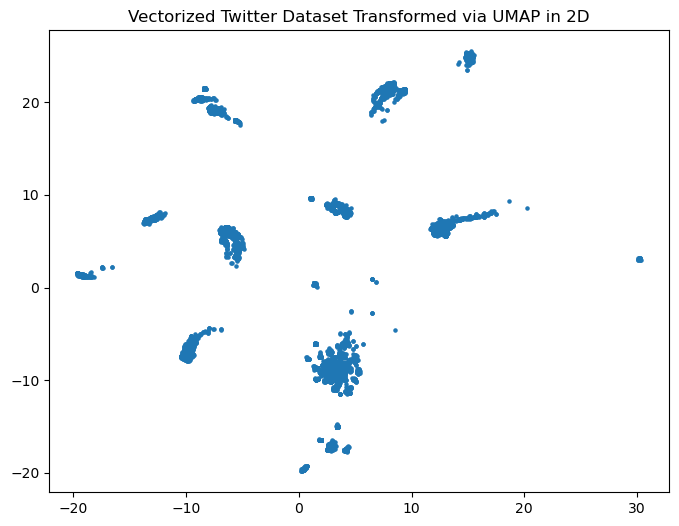

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(embed[:, 0], embed[:, 1], s=5)
plt.title(f"Vectorized Twitter Dataset Transformed via UMAP in 2D")
plt.savefig("umap_twitter.png", dpi = 300)
plt.show()

In [27]:
# fit GMM clustering and plot
model = GaussianMixture(n_components=10)
labels = model.fit_predict(embed)

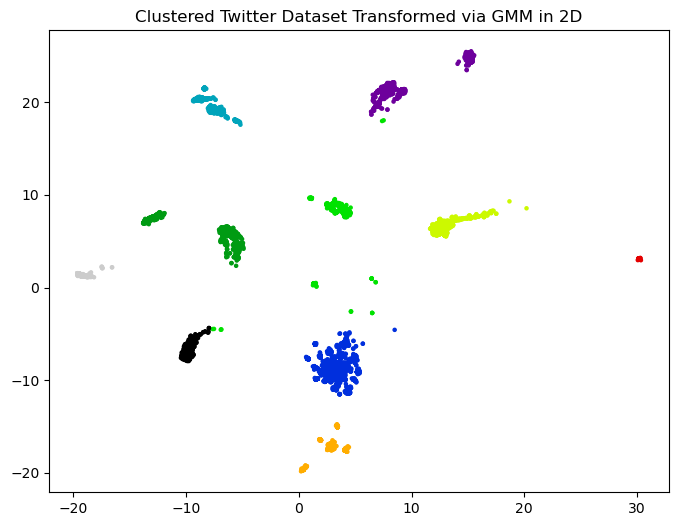

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(embed[:, 0], embed[:, 1], s=5, c=labels, cmap='nipy_spectral')
plt.title(f"Clustered Twitter Dataset Transformed via GMM in 2D")
plt.savefig("clustered_twitter.png", dpi = 300)
plt.show()